In [12]:
# imports
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sympy import false
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.backends.cudnn as cudnn

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from torchmetrics import Accuracy
from tqdm import tqdm

import glob


In [13]:
#function load dataset
def har_dataset(phase):
    x = []
    data_dir = f'HAR_Dataset/{phase}/Inertial Signals/*'
    for file_dir in glob.glob(data_dir):
        x.append(np.loadtxt(file_dir))
    y = np.loadtxt(f'HAR_Dataset/{phase}/y_{phase}.txt')
    #x,y to Tensor
    x = torch.FloatTensor(x).permute(1, 2, 0)
    y = torch.LongTensor(y) - 1
    return x, y


In [14]:
x_train, y_train = har_dataset('train')
x_test, y_test = har_dataset('test')

In [15]:
x_train.shape, y_train.shape

(torch.Size([7352, 128, 9]), torch.Size([7352]))

In [16]:
x_test.shape, y_test.shape

(torch.Size([2947, 128, 9]), torch.Size([2947]))

In [17]:
y_train

tensor([4, 4, 4,  ..., 1, 1, 1])

In [18]:
torch.unique(y_train)

tensor([0, 1, 2, 3, 4, 5])

In [19]:
# Tensor Dataset
train_set = TensorDataset(x_train, y_train)
test_set = TensorDataset(x_test, y_test)

In [20]:
#dataloader
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=128, shuffle=False)

In [33]:
x, y = next(iter(train_loader))
print(x.shape, y.shape)

torch.Size([64, 128, 9]) torch.Size([64])


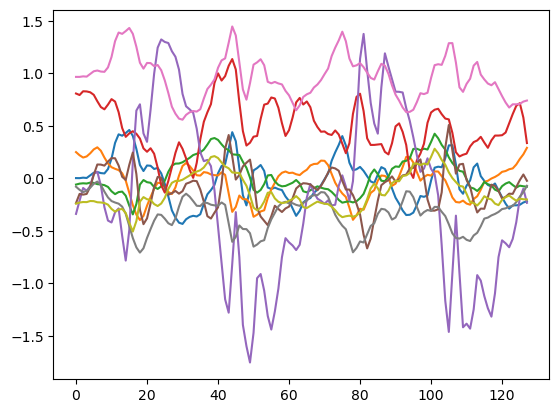

In [34]:
#plot one sample
plt.plot(x[0])
# plt.show()